<a href="https://colab.research.google.com/github/johnsl01/linreg/blob/master/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
###############################################
#@title                 IMPORTS               #
###############################################
print ("Imports")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime
print (datetime.now())



Imports
2019-09-23 16:18:33.317255


In [113]:
# where X is a 2D np.array and theta is tuple
# returns h_theta_x a 1D np.array
print ("def h_theta(X,theta)")
def h_theta(X,theta):
  (_,n) = X.shape
  t = len(theta)
  if (t is n+1):
    theta_np = np.array(theta[1:(t)])
    theta0 = theta[0]
  elif (t is n):
    theta_np = np.array(theta[0:(t)])
    theta0 = 0
  print(X)
  print(theta_np)


    # h_theta = theta0 + theta1*X[1] + ...
  h_theta_x = np.multiply(theta_np, X)
  print(h_theta_x)
    # for each row in X, h_theta[i] = X[i] * thetaN
  h_theta_x = np.add(h_theta_x, theta0)
  print(h_theta_x)
    # for each element in h_theta, h_theta[i] += theta0
  return h_theta_x
#end h_theta

# where X is a 2D np.array, and y is a 1D array and theta is a tuple
print("def linearRegression(X, y, theta)")
def linearRegression(X, y, theta):
  (m,_) = X.shape # extracts dimensions
  h_theta_x = h_theta(X, theta)
  diff = np.subtract(h_theta_x, y)
    # for each element, h_theta[i] - y[i]
  total_error = np.sum(np.multiply(diff, diff))
    # squares each element in diff and sums them to find total error
  j_theta = total_error/(2*m)
  return j_theta
# end linearRegression


# assumes that X is a 2D np.array, and y and theta are 1D np.arrays
print("def gradientDescent_1(X, y, theta_in, alpha)")
def gradientDescent_1(X, y, theta_in, alpha):
  (m, _) = X.shape
  h_theta_x = h_theta(X, theta_in)
  diff = np.subtract(h_theta_x, y)
    # for each element, h_theta[i] - y[i]
  prodsum = np.sum(np.multiply(diff,X))

  theta_out = theta_in - (alpha*prodsum)/m
  return theta_out
# end gradientDescent_1




print("def predict(X, theta)")
def predict(X, theta):
  # takes m by n matrix X as input and returns an m by 1 vector 
  # containing the predictions h_theta(x^i) for each row x^i, i=1,...,m in X
  ##### replace the next line with your code #####
  # print(X)
  # print(theta)
  # print(X.shape)
  
  if len(X.shape) == 1 : 
    pred = X[0]*theta[0] + X[1]*theta[1]   
  else : 
    pred = X[:,0]*theta[0] + X[:,1]*theta[1] 
    
  # print(pred)
  return pred
# end predict




print("def computeCost(X, y, theta)")
def computeCost(X, y, theta):
  # function calculates the cost J(theta) and return its value
  ##### replace the next line with your code #####
  print ("Compute cost #1 : " , X.shape, y.shape, theta.shape)
  costpred = predict (X,theta)
  print ("Compute Cost #2 :", costpred.shape)
  costbase = costpred - y
  print ("Compute Cost #3 :", costbase.shape)
  costsq = costbase * costbase
  print ("Compute Cost #4 :", costsq.shape)
  sumcost = costsq.sum()
  print ("Compute Cost #5 :", sumcost)
  # print (y)
  # print (costpred)
  print ("Compute Cost #6 :", len(y))
  
  cost = sumcost/(2*len(y))
  print ("Compute Cost #7 :", cost)
  
  
  # cost = 0
  return cost




print("def computeGradient(X, y, theta)")
def computeGradient(X, y, theta):
  # function calulate the gradient of J(theta) and returns its value
  ##### replace the next line with your code #####
  n=len(theta)
  grad = np.zeros(n)
  return grad


print (datetime.now())


def h_theta(X,theta)
def linearRegression(X, y, theta)
def gradientDescent_1(X, y, theta_in, alpha)
def predict(X, theta)
def computeCost(X, y, theta)
def computeGradient(X, y, theta)
2019-09-23 17:17:58.068315


In [48]:

print("def gradientDescent(X, y, numparams)")
def gradientDescent(X, y, numparams):
  # iteratively update parameter vector theta
  # -- you should not modify this function

  # initialize variables for learning rate and iterations
  alpha = 0.02
  iters = 5000
  cost = np.zeros(iters)
  theta= np.zeros(numparams)

  for i in range(iters):
    theta = theta - alpha * computeGradient(X,y,theta)
    cost[i] = computeCost(X, y, theta)

  return theta, cost



print("def normaliseData(x)")
def normaliseData(x):
  # rescale data to lie between 0 and 1
  scale = x.max(axis=0)
  return (x/scale, scale)



print("def splitData(X, y)")
def splitData(X, y):
  # split data into training and test parts
  # ... for now, we use all of the data for training and testing
  Xtrain=X; ytrain=y; Xtest=X; ytest=y
  return (Xtrain, ytrain, Xtest, ytest)

print (datetime.now())

def gradientDescent(X, y, numparams)
def normaliseData(x)
def splitData(X, y)
2019-09-23 16:19:00.532776


In [49]:
print ("def main()")
def main():
  # load the data
  # "https://raw.githubusercontent.com/johnsl01/Titanic_Python/master/titanic_known.csv"
  data=np.loadtxt('https://raw.githubusercontent.com/johnsl01/linreg/master/stockprices.csv',usecols=(1,2))
  X=data[:,0]
  y=data[:,1]

  # plot the data so we can see how it looks
  # (output is in file graph.png)
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(X, y, label='Data')
  ax.set_xlabel('Amazon')
  ax.set_ylabel('Google')
  ax.set_title('Google stock price vs Amazon')
  fig.savefig('graph.png')

  # split the data into training and test parts
  (Xtrain, ytrain, Xtest, ytest)=splitData(X,y)

  # add a column of ones to input data
  m=len(y) # m is number of training data points
  Xtrain = np.column_stack((np.ones((m, 1)), Xtrain))
  (m,n)=Xtrain.shape # m is number of data points, n number of features

  # rescale training data to lie between 0 and 1
  (Xt,Xscale) = normaliseData(Xtrain)
  (yt,yscale) = normaliseData(ytrain)

  # calculate the prediction
  print('testing the prediction function ...')
  theta=(1,2)
  print('when x=[1,1] and theta is [1,2]) cost = ',predict(np.ones(n),theta))
  print('approx expected prediction is 3')
  print('when x=[[1,1],[5,5]] and theta is [1,2]) cost = ',predict(np.array([[1,1],[5,5]]),theta))
  print('approx expected prediction is [3,11]')
  input('Press Enter to continue...')

  # calculate the cost when theta iz zero
  print('testing the cost function ...')
  theta=np.zeros(n)
  print('when theta is zero cost = ',computeCost(Xt,yt,theta))
  print('approx expected cost value is 0.318')
  input('Press Enter to continue...')

  # calculate the gradient when theta is zero
  print('testing the gradient function ...')
  print('when theta is zero gradient = ',computeGradient(Xt,yt,theta))
  print('approx expected gradient value is [-0.79,-0.59]')
  input('Press Enter to continue...')

  # perform gradient descent to "fit" the model parameters
  print('running gradient descent ...')
  theta, cost = gradientDescent(Xt, yt, n)
  print('after running gradientDescent() theta=',theta)
  print('approx expected value is [0.34, 0.61]')

  # plot some predictions
  Xpred = np.linspace(X.min(), X.max(), 100)
  Xpred = np.column_stack((np.ones((100, 1)), Xpred))
  ypred = predict(Xpred/Xscale, theta)*yscale
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(Xtest, ytest, color='b', label='Test Data')
  ax.plot(Xpred[:,1], ypred, 'r', label='Prediction')
  ax.set_xlabel('Amazon')
  ax.set_ylabel('Google')
  ax.legend(loc=2)
  fig.savefig('pred.png')

  # and plot how the cost varies as the gradient descent proceeds
  fig2, ax2 = plt.subplots(figsize=(12, 8))
  ax2.semilogy(cost,'r')
  ax2.set_xlabel('iteration')
  ax2.set_ylabel('cost')
  fig2.savefig('cost.png')
  
  # plot the cost function
  fig3 = plt.figure()
  ax3 = fig3.add_subplot(1, 1, 1, projection='3d')
  n=100
  theta0, theta1 = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 2, n))
  cost = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      cost[i,j] = computeCost(Xt,yt,(theta0[i,j],theta1[i,j]))
  ax3.plot_surface(theta0,theta1,cost)
  ax3.set_xlabel('theta0')
  ax3.set_ylabel('theta1')
  ax3.set_zlabel('J(theta)')
  fig3.savefig('J.png')
  
  
print (datetime.now())


def main()
2019-09-23 16:19:05.733429


2019-09-23 17:18:15.023978
testing the prediction function ...
when x=[1,1] and theta is [1,2]) cost =  3.0
approx expected prediction is 3
when x=[[1,1],[5,5]] and theta is [1,2]) cost =  [ 3 15]
approx expected prediction is [3,11]
Press Enter to continue...
testing the cost function ...
Compute cost #1 :  (248, 2) (248,) (2,)
Compute Cost #2 : (248,)
Compute Cost #3 : (248,)
Compute Cost #4 : (248,)
Compute Cost #5 : 158.06347382089487
Compute Cost #6 : 248
Compute Cost #7 : 0.3186763585098687
when theta is zero cost =  0.3186763585098687
approx expected cost value is 0.318
Press Enter to continue...
testing the gradient function ...
when theta is zero gradient =  [0. 0.]
approx expected gradient value is [-0.79,-0.59]
Press Enter to continue...
running gradient descent ...
Compute cost #1 :  (248, 2) (248,) (2,)
Compute Cost #2 : (248,)
Compute Cost #3 : (248,)
Compute Cost #4 : (248,)
Compute Cost #5 : 158.06347382089487
Compute Cost #6 : 248
Compute Cost #7 : 0.3186763585098687
C

AttributeError: ignored

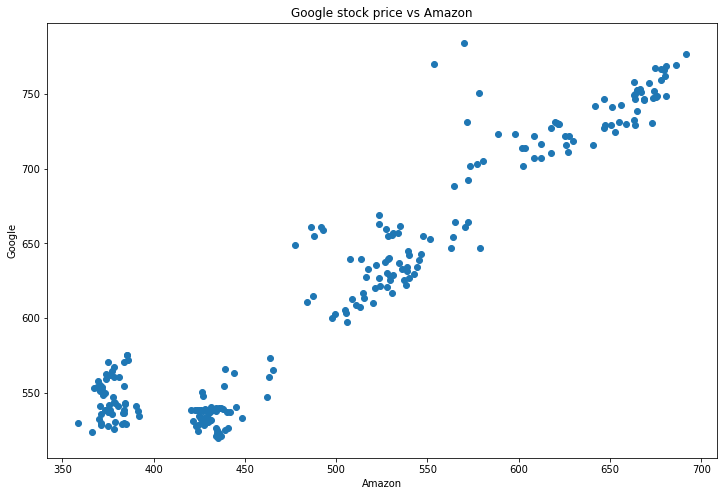

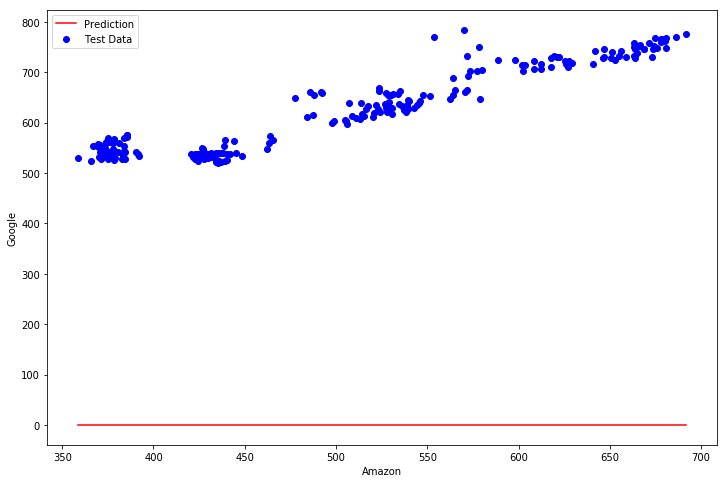

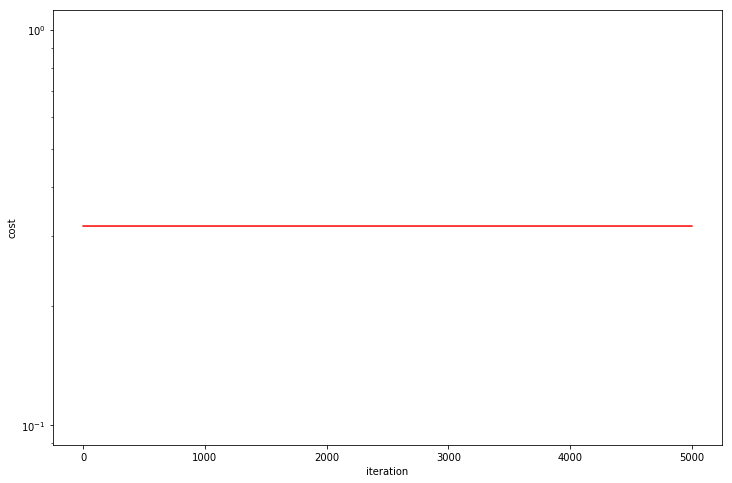

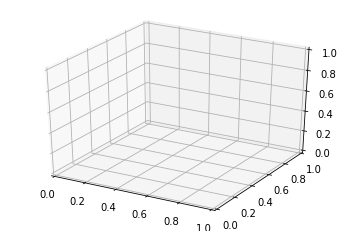

In [114]:
print (datetime.now())

main()

print (datetime.now())


In [0]:
# test section 
# assume all defs are in place 
# but main hasn't run

test_array = np.array([[1,3],[5,7],[11,13]])
print ( test_array.shape )
test_theta = np.array([[1,2,3]])
print ( test_theta.shape )

test_predict = predict (test_array, test_theta)
print(test_predict)



In [0]:
print (test_array)
print (test_array * 2)

In [0]:
print (test_array + test_array)
print (test_array[0,:])
print (test_array[1,:])
print (test_array[2,:])
print (test_array[:,0])
print (test_array[:,1])

In [0]:
predict_1 = np.zeros((test_array.shape[0],test_array.shape[1]))
print (predict_1.shape)
print (predict_1)

print (predict_1[0,:])
print (predict_1[1,:])
print (predict_1[2,:])
print (predict_1[:,0])
print (predict_1[:,1])

In [0]:
testnum = "Case #1"
myX = np.array([1,1])
mytheta = (1,2)

In [0]:
testnum = "Case #2"
myX = np.array([[1,1],[5,5]])
mytheta = (1,2)

In [94]:
print (testnum)
print (datetime.now())
print ("Shape of myX : ", myX.shape)
print ("Type of myX.shape : " , type (myX.shape))
print ("Len of myX.shape : ", len(myX.shape))
if len(myX.shape) == 1 : 
  print ("myX col 0 : ", myX[0])
  print ("myX col 1 : ", myX[1])
else : 
  print ("myX col 0 : ", myX[:,0])
  print ("myX col 1 : ", myX[:,1])
print (mytheta[0])
print (mytheta[1])
mypredict_1 = predict(myX,mytheta)
print (mypredict_1.shape)
print (mypredict_1)
print (datetime.now())

Case #2
2019-09-23 16:48:02.649345
Shape of myX :  (2, 2)
Type of myX.shape :  <class 'tuple'>
Len of myX.shape :  2
myX col 0 :  [1 5]
myX col 1 :  [1 5]
1
2
(2,)
[ 3 15]
2019-09-23 16:48:02.659455
